/var/folders/lv/st0pk19j1nl0vj5ry67mxbtw0000gn/T/ipykernel_15773/275788113.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/lv/st0pk19j1nl0vj5ry67mxbtw0000gn/T/ipykernel_15773/275788113.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


Theoretical gradient: 140007
Gradient =  157149.7392140233  error =  37550.8326030314
Intercept =  240.85546506884347  error =  103.99318875733823


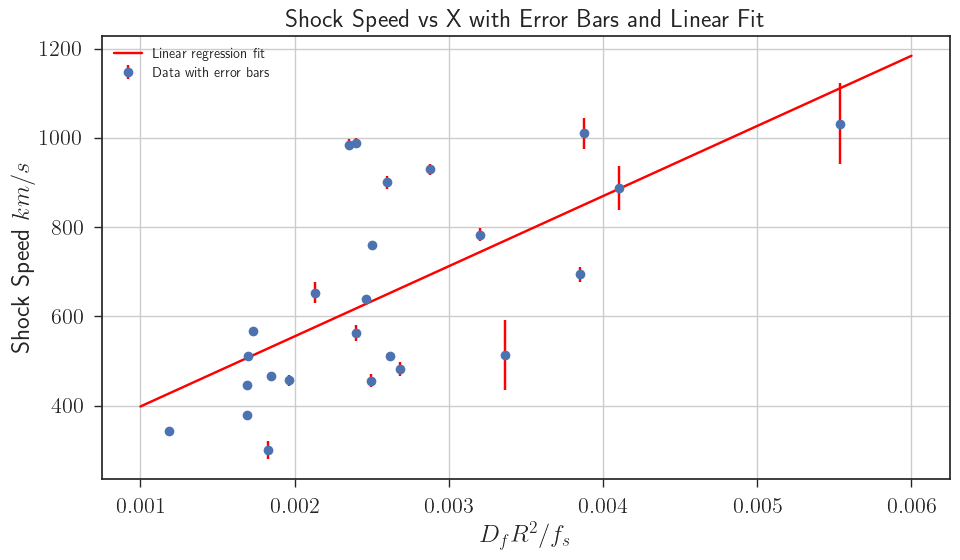

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn')
plt.style.use('seaborn-ticks')
plt.rcParams['font.size'] = '20'
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['xtick.labelsize'] = '16'
plt.rcParams['ytick.labelsize'] = '16'  
plt.rcParams['axes.labelsize'] = '18'
plt.rcParams['axes.titlesize'] = '18'
plt.rcParams['figure.edgecolor'] ="black"
plt.rcParams['errorbar.capsize'] =10
plt.rcParams['figure.autolayout']=True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
})

# Load the dataset
file_path = '/Users/saan/Desktop/Academic/Research/Data/Final Data23.csv'
data = pd.read_csv(file_path)

# Creating a new dataframe with specified columns
new_data = data[['Date', 'Station', 'Shock_speed']].copy()

# Calculating the new column 'X'
new_data['X'] = ((data['R']**2) * abs(data['Frequency_drift'])) / data['fs']

# Calculating the error values of the parameter 'X'
X_err = np.sqrt(
    ((abs(data['Frequency_drift']) * data['err_R'] / data['fs']) ** 2) +
    ((data['R'] * abs(data['Frequency_drift']) * data['err_fs'] / data['fs'] ** 2) ** 2) +
    ((data['R'] * data['err_drift'] / data['fs']) ** 2)
)
new_data['X_err'] = X_err
new_data['err_shock_speed'] = data['err_shock_speed']

# Clean the data (remove rows with NaN in 'X', 'Shock_speed', 'X_err', 'err_shock_speed')
new_data_cleaned = new_data.dropna(subset=['X', 'Shock_speed', 'X_err', 'err_shock_speed'])

# Fitting the data using sklearn LinearRegression
X_cleaned = new_data_cleaned['X'].values.reshape(-1, 1)
Y_cleaned = new_data_cleaned['Shock_speed'].values
linear_regressor = LinearRegression()
linear_regressor.fit(X_cleaned, Y_cleaned)
Y_pred = linear_regressor.predict(X_cleaned)

# Fitting the data using numpy.polyfit
coefficients, cov_matrix = np.polyfit(new_data_cleaned['X'], new_data_cleaned['Shock_speed'], 1, cov=True)
m_poly, c_poly = coefficients
SE_m_poly = np.sqrt(cov_matrix[0, 0])
SE_c_poly = np.sqrt(cov_matrix[1, 1])

x = np.linspace(0.001,0.006,500)
new_data = m_poly*x+c_poly

print('Theoretical gradient: 140007')

print('Gradient = ', m_poly, ' error = ', SE_m_poly)
print('Intercept = ', c_poly, ' error = ', SE_c_poly)

# Plotting the data with error bars and the linear regression line
plt.figure(figsize=(10, 6))
plt.errorbar(new_data_cleaned['X'], new_data_cleaned['Shock_speed'], yerr=new_data_cleaned['err_shock_speed'], fmt='o', ecolor='red', label='Data with error bars', capsize=1.5)
plt.plot(x, new_data, color='red', label='Linear regression fit')
plt.title('Shock Speed vs X with Error Bars and Linear Fit')
plt.xlabel('$D_fR^2/f_s$')
plt.ylabel('Shock Speed $km/s$')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
#Theoretical Gradient is 1400007

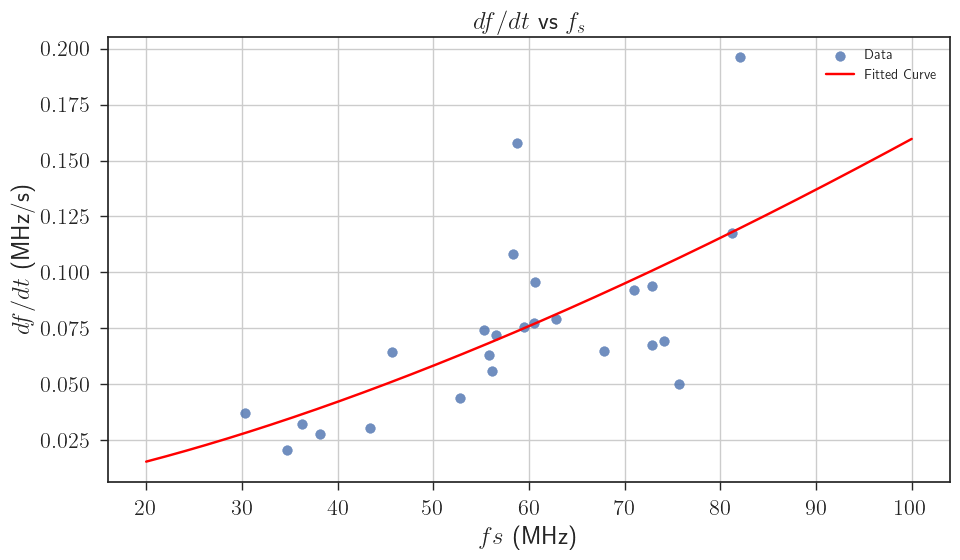

((-0.0001969841998647299, 0.00034346334077963315),
 (1.4544162013757918, 0.4159987492482952))

In [3]:
from scipy.optimize import curve_fit


# Defining the model function
def model_function(x, a, b):
    return -a * x ** (b)

# Extracting the data
x_data = data['fs']
y_data = abs(data['Frequency_drift'])


# Removing rows with NaNs or infinite values
data_clean = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['fs', 'Frequency_drift'])

# Extracting the cleaned data
x_data_clean = data_clean['fs']
y_data_clean = abs(data_clean['Frequency_drift'])

# Fitting the data to the model function again
popt, pcov = curve_fit(model_function, x_data_clean, y_data_clean, maxfev=10000)

# Extracting the parameters and their errors
a, b = popt
error_a, error_b = np.sqrt(np.diag(pcov))

# Generating y values based on the fitted model
x_fit = np.linspace(20, 100, 500)
y_fit = model_function(x_fit, a, b)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_data_clean, y_data_clean, alpha=0.8, label='Data')
plt.plot(x_fit, y_fit, 'r-', label=f'Fitted Curve')
plt.title('$df/dt$ vs $f_s$')
plt.xlabel('$fs$ (MHz)')
plt.ylabel('$df/dt$ (MHz/s)')
plt.legend()
plt.grid(True)
plt.show()

(a, error_a), (b, error_b)


In [4]:
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

# Calculating the correlation coefficient
corr_coeff, _ = pearsonr(x_data_clean, y_data_clean)

# Calculating R^2 (coefficient of determination)
y_fit_data = model_function(x_data_clean, *popt)
r_squared = r2_score(y_data_clean, y_fit_data)

corr_coeff, r_squared


(0.6495309782806192, 0.42174618034418954)

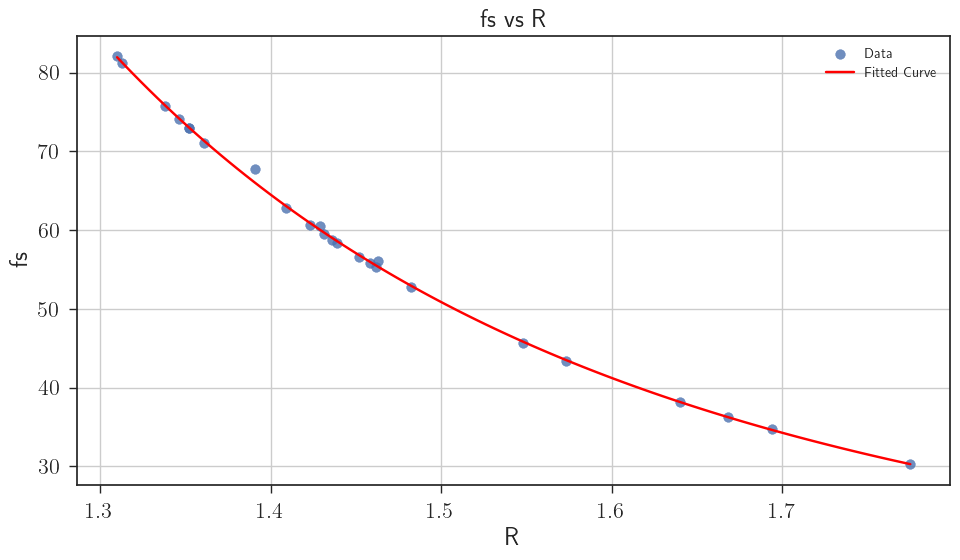

(222.65474865679485, 4.195641798812833, -10.235091603915025)

In [5]:
from scipy.optimize import curve_fit

x_data_R = data_clean['R']
y_data_fs = data_clean['fs']

# Re-defining the model function for the equation y = ax^(-b) - c
def model_function_R(x, a, b, c):
    return a * x ** (-b) - c

# Providing initial parameter estimates for a, b, and c
initial_guess = [1, 1, 1]

# Setting bounds for the parameters
lower_bounds = [0, 0, -np.inf]
upper_bounds = [np.inf, np.inf, np.inf]

# Attempting to fit the data to the model function again with initial guesses and bounds
popt_R, pcov_R = curve_fit(model_function_R, x_data_R, y_data_fs, p0=initial_guess, bounds=(lower_bounds, upper_bounds), maxfev=10000)

# Extracting the parameters
a_R, b_R, c_R = popt_R

# Generating y values based on the fitted model for R and fs
x_fit_R = np.linspace(min(x_data_R), max(x_data_R), 100)
y_fit_R = model_function_R(x_fit_R, a_R, b_R, c_R)

# Plotting fs vs R with the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data_R, y_data_fs, alpha=0.8, label='Data')
plt.plot(x_fit_R, y_fit_R, 'r-', label=f'Fitted Curve')
plt.title('fs vs R')
plt.xlabel('R')
plt.ylabel('fs')
plt.legend()
plt.grid(True)
plt.show()

a_R, b_R, c_R